In [122]:
import numpy as np
import pandas as pd

import seaborn as sea

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [123]:
sea.set_style("darkgrid")

In [124]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data.head(10).style.format(precision=2). \
                    set_properties(**{"min-width": "80px"}). \
                    set_properties(**{"color": "#111111"}). \
                    set_properties(**{"text-align": "center"}). \
                    set_table_styles([
                          {"selector": "th",
                           "props": [("font-weight", "bold"),
                                     ("font-size", "12px"),
                                     ("text-align", "center")]},
                          {"selector": "tr:nth-child(even)",
                           "props": [("background-color", "#f2f2f2")]},
                          {"selector": "tr:nth-child(odd)",
                           "props": [("background-color", "#fdfdfd")]},
                          {"selector": "tr:hover",
                           "props": [("background-color", "#bcbcbc")]}])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [125]:
data.drop("customerID", axis=1, inplace=True)

In [126]:
pd.options.mode.chained_assignment = None

data_X = data.loc[:, data.columns != "Churn"]
data_Y = data[["Churn"]]

print("\ndata_X info:\n")
data_X.info()
print("\ndata_Y info:\n")
data_Y.info()


data_X info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-

In [127]:
for c in data_X.columns:
    
    print("Feature name: {}".format(c))
    print("Unique values:\n")
    print(data_X[c].unique())
    print("\n--------------------------------------------------\n")

Feature name: gender
Unique values:

['Female' 'Male']

--------------------------------------------------

Feature name: SeniorCitizen
Unique values:

[0 1]

--------------------------------------------------

Feature name: Partner
Unique values:

['Yes' 'No']

--------------------------------------------------

Feature name: Dependents
Unique values:

['No' 'Yes']

--------------------------------------------------

Feature name: tenure
Unique values:

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--------------------------------------------------

Feature name: PhoneService
Unique values:

['No' 'Yes']

--------------------------------------------------

Feature name: MultipleLines
Unique values:

['No phone service' 'No' 'Yes']

--------------------------------------------------

Feature name: InternetServ

In [128]:
data_X["TotalCharges"] = [s.replace(" ","")
                          for s in data_X["TotalCharges"]]
data_X["TotalCharges"] = pd.to_numeric(data_X["TotalCharges"])

In [129]:
data_X["TotalCharges"].isnull().sum()

11

In [130]:
data_X["TotalCharges"] = data_X["TotalCharges"].fillna(data_X["TotalCharges"].mean())


In [131]:
cat = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
       "MultipleLines", "InternetService", "OnlineSecurity",
       "OnlineBackup", "DeviceProtection", "TechSupport",
       "StreamingTV", "StreamingMovies", "Contract",
       "PaperlessBilling", "PaymentMethod"]

num = ["tenure", "MonthlyCharges", "TotalCharges"]

In [132]:
enc = OneHotEncoder(drop="first")
enc.fit(data_X[cat]);

cat2 = enc.get_feature_names_out(cat)
data_X_C = pd.DataFrame(enc.transform(data_X[cat]).toarray(),
                        columns=cat2)


In [133]:
data_X = pd.concat([data_X_C, data_X[num]], axis=1)

In [134]:
feature_names = data_X.columns
print(feature_names)

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [135]:
data_Y["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [136]:
lb = LabelBinarizer()

lb.fit(data_Y["Churn"]);
data_Y["Churn"] = lb.transform(data_Y["Churn"])

In [137]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    stratify=data_Y,
                                                    random_state=0)

train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

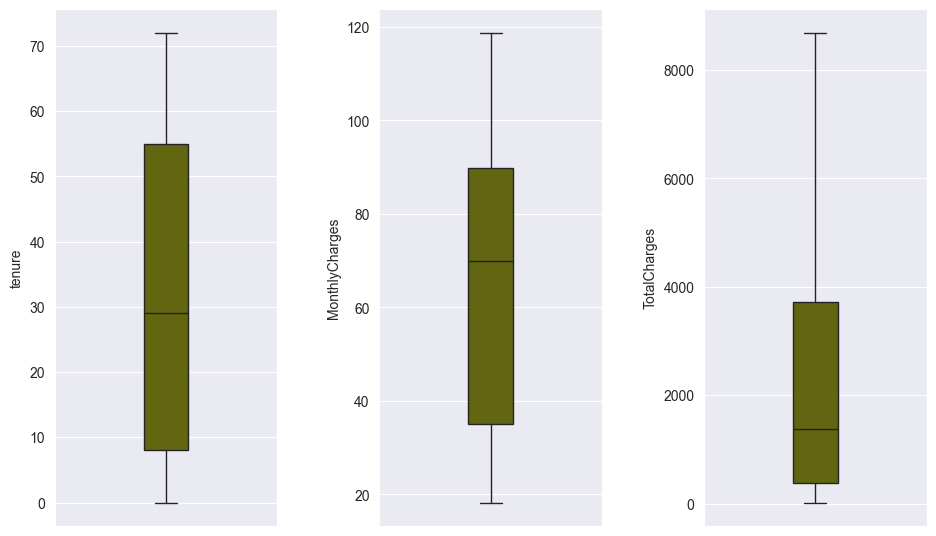

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
for i, c in enumerate(train_X[num]):
    sea.boxplot(train_X[c], orient="v", color = "#6f7501",
                                width = 0.2, ax=axes[i])
    
fig.tight_layout(pad=3.0)

C:\Users\SETYO NITI WICAKSONO\AppData\Local\Temp\ipykernel_1252\4126765707.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(train_X.loc[train_Y["Churn"]==0,c], kde = False,
C:\Users\SETYO NITI WICAKSONO\AppData\Local\Temp\ipykernel_1252\4126765707.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.d

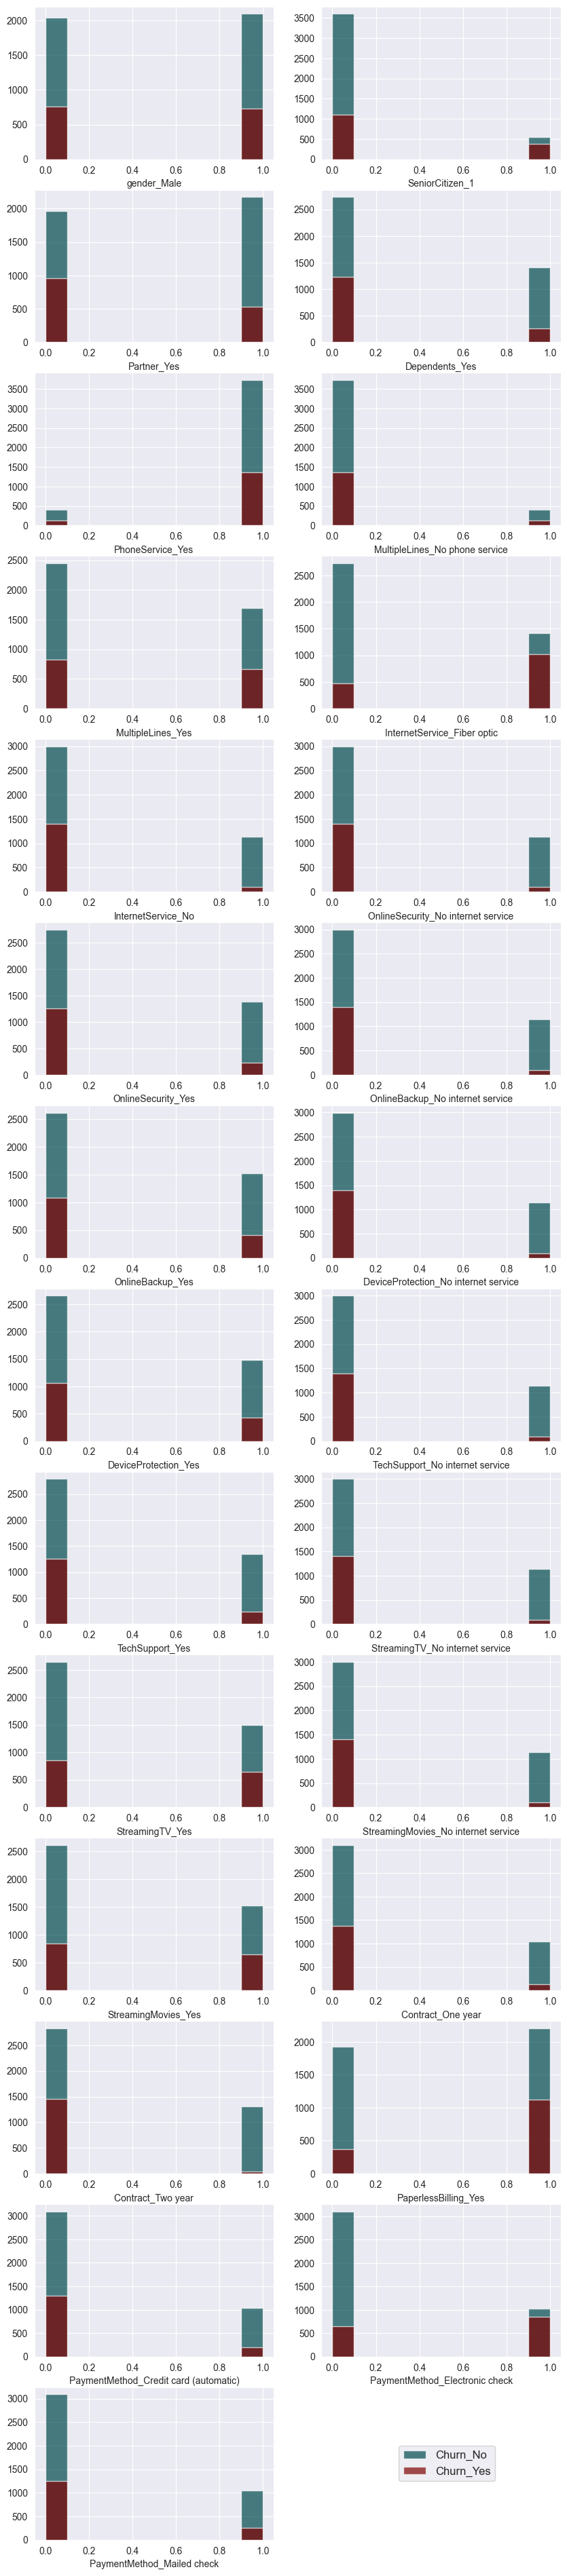

In [139]:
fig = plt.figure(figsize=(10,66))
gs = gridspec.GridSpec(nrows=19, ncols=2, figure=fig)

for i, c in enumerate(train_X[cat2]):
    y, x = int(i/2), i%2

    ax = fig.add_subplot(gs[y,x])    
    sea.distplot(train_X.loc[train_Y["Churn"]==0,c], kde = False,
                 color = "#004a4d", hist_kws = dict(alpha=0.7),
                 bins=10, label="Churn_No", ax=ax);
    sea.distplot(train_X.loc[train_Y["Churn"]==1,c], kde = False,
                 color = "#7d0101", hist_kws = dict(alpha=0.7),
                 bins=10, label="Churn_Yes", ax=ax);

ax.legend(loc="center left", bbox_to_anchor=(1.5,0.5),
          prop={"size":12});

C:\Users\SETYO NITI WICAKSONO\AppData\Local\Temp\ipykernel_1252\91058069.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(train_X.loc[train_Y["Churn"] == 0, c], kde=True,
C:\Users\SETYO NITI WICAKSONO\AppData\Local\Temp\ipykernel_1252\91058069.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distp

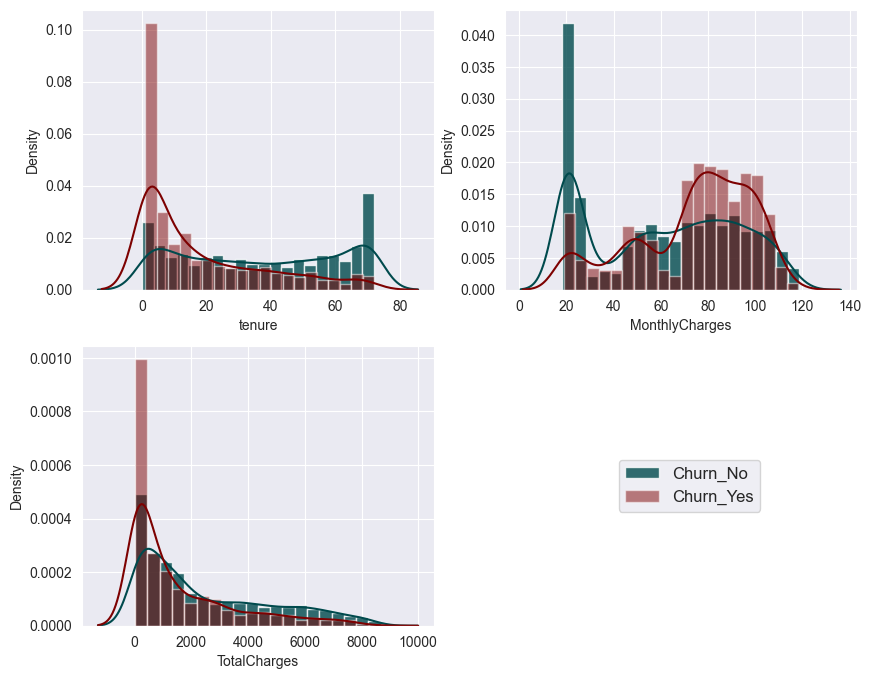

In [140]:
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

for i, c in enumerate(train_X[num]):
    y, x = int(i/2), i % 2

    ax = fig.add_subplot(gs[y, x])    
    sea.distplot(train_X.loc[train_Y["Churn"] == 0, c], kde=True,
                 color="#004a4d", hist_kws=dict(alpha=0.8),
                 bins=20, label="Churn_No", ax=ax)
    sea.distplot(train_X.loc[train_Y["Churn"] == 1, c], kde=True,
                 color="#7d0101", hist_kws=dict(alpha=0.5),
                 bins=20, label="Churn_Yes", ax=ax)

ax.legend(loc="center left", bbox_to_anchor=(1.5, 0.5),
          prop={"size": 12})


In [141]:
scaler = StandardScaler()

# fit to train_X
scaler.fit(train_X)

# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)

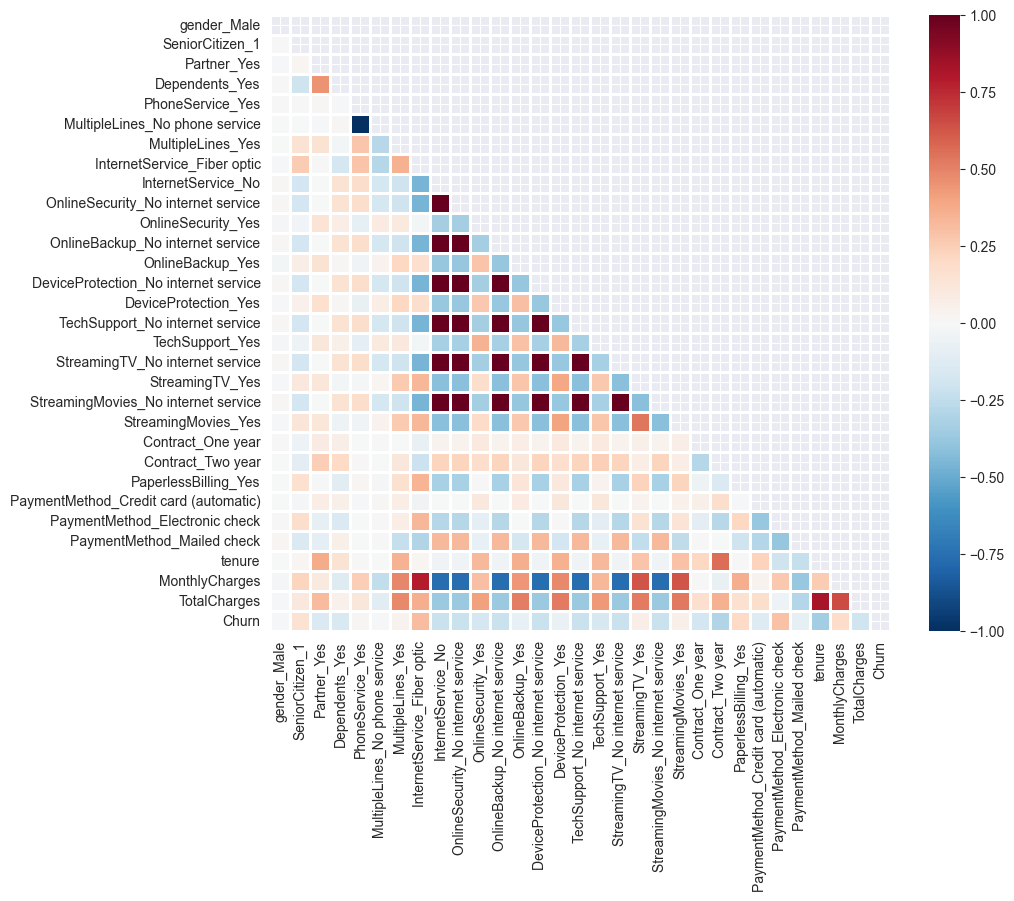

In [142]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=False, fmt=".1f", vmin=-1,
            vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");

In [143]:
drop = ["OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service",
        "MultipleLines_No phone service"]

for d in drop:
    train_X.drop(d, axis=1, inplace=True)
    test_X.drop(d, axis=1, inplace=True)
    
np_train_X = train_X.values
np_train_Y = train_Y.values.ravel()
np_test_X = test_X.values
np_test_Y = test_Y.values.ravel()

In [144]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(30, 50, 2),
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["brute"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
)

gscv.fit(np_train_X, np_train_Y)
print("Best parameters {}".format(gscv.best_params_))

Best parameters {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 44, 'p': 1.0}


In [145]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_train_X, np_train_Y)
y_pred = knn_cls.predict(np_test_X)
print(classification_report(np_test_Y, y_pred,
                            target_names=["Churn No", "Churn Yes"]))

              precision    recall  f1-score   support

    Churn No       0.85      0.88      0.86      1035
   Churn Yes       0.63      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(40, 60, 2),
    "leaf_size": [1, 2, 3],
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["kd_tree"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
)

gscv.fit(np_train_X, np_train_Y)
print("Best parameters {}".format(gscv.best_params_))

In [ ]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_train_X, np_train_Y)
y_pred = knn_cls.predict(np_test_X)
print(classification_report(np_test_Y, y_pred,
                            target_names=["Churn No", "Churn Yes"]))